## Simple Linear Regression

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data=pd.read_csv('MBA Salary.csv')
data.head()

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [34]:
data.shape

(50, 3)

In [35]:
data.describe()

,S. No.,Percentage in Grade 10,Salary
count,50.00000,50.000000,50.000000
mean,25.50000,63.922400,258192.000000
std,14.57738,9.859937,76715.790993
min,1.00000,37.330000,120000.000000
25%,13.25000,57.685000,204500.000000
50%,25.50000,64.700000,250000.000000
75%,37.75000,70.000000,300000.000000
max,50.00000,83.000000,450000.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
S. No.                    50 non-null int64
Percentage in Grade 10    50 non-null float64
Salary                    50 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [37]:
data.columns

Index(['S. No.', 'Percentage in Grade 10', 'Salary'], dtype='object')

In [38]:
data.head()

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [39]:
import statsmodels.api as sm

In [40]:
X=sm.add_constant(data['Percentage in Grade 10'])

D:\DELL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [41]:
X.head()

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [42]:
Y=data['Salary']

In [43]:
Y.head()

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.8,random_state=100)

In [46]:
data_lm=sm.OLS(train_Y,train_X).fit()

In [47]:
print(data_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


## Model Diagnostics

In [48]:
data_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     10.16
Date:                Wed, 22 Jan 2020   Prob (F-statistic):            0.00287
Time:                        18:04:49   Log-Likelihood:                -502.43
No. Observations:                  40   AIC:                             1009.
Df Residuals:                      38   BIC:                             1012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.059e+04   7.19e+04      0.426      0.673   -1.15e+05    1.76e+05
Percentage in Grade 10  3560.5874   1116.926      3.188      0.003    1299.489    5821.686
==============================================================================
Omnibus:                        2.048   Durbin-Watson:                   2.611
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.724
Skew:                           0.369   Prob(JB):                        0.422
Kurtosis:                       2.300   Cond. No.                         413.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 576x432 with 0 Axes>

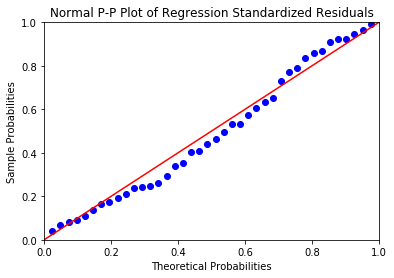

In [49]:
data_resid=data_lm.resid
probplot=sm.ProbPlot(data_resid)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title('Normal P-P Plot of Regression Standardized Residuals')
plt.show()

In [50]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

Text(0, 0.5, 'Standardized Residuals')

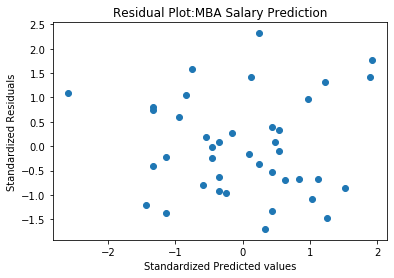

In [51]:
plt.scatter(get_standardized_values(data_lm.fittedvalues),
           get_standardized_values(data_resid))
plt.title('Residual Plot:MBA Salary Prediction')
plt.xlabel('Standardized Predicted values')
plt.ylabel('Standardized Residuals')

In [52]:
from scipy.stats import zscore

In [61]:
data['z_score_salary']=zscore(data.Salary)

In [62]:
from sklearn.metrics import r2_score,mean_squared_error

In [63]:
pred_Y=data_lm.predict(test_X)

In [64]:
np.abs(r2_score(test_Y,pred_Y))

0.15664584974230378

In [60]:
np.sqrt(mean_squared_error(test_Y,pred_Y))

73458.04348346894